In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Step 1: Extract Data

In [2]:
heart_disease_data = pd.read_csv(r'C:\Users\Gourav vijay Gaikwad\Downloads\Heart Disease data Analysis\Heart Disease data\Heart Disease data.csv')

In [3]:
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Attribute Information

age : The person's age in Years

sex : The person's Gender ( 1 = male, 2 = female)

cp (chest pain type) : The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

trestbps : The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's serum cholestoral in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no) exercise induced angina

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

target: Heart disease (0 = no, 1 = yes)

In [4]:
sex_mapping = {0: 'female', 1: 'male'}

In [5]:
heart_disease_data['sex'] = heart_disease_data['sex'].map(sex_mapping)

In [6]:
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1


# Calculate overall heart disease rate

In [7]:
# Calculate overall heart disease rate
overall_heart_disease_rate = heart_disease_data['target'].mean()

In [8]:
overall_heart_disease_rate

0.5131707317073171

# Group data by gender and calculate heart disease rates for each gender

In [9]:
heart_disease_by_gender = heart_disease_data.groupby('sex')['target'].mean()


In [10]:
heart_disease_by_gender

sex
female    0.724359
male      0.420757
Name: target, dtype: float64

# Define the bins for age groups

In [11]:
bins = [0, 30, 40, 50, 60, 70, 80]

# Define labels for the age groups

In [12]:
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create a new column 'age_group' in the DataFrame

In [13]:
heart_disease_data['age_group'] = pd.cut(heart_disease_data['age'], bins=bins, labels=labels, right=False)

In [14]:
print(heart_disease_data[['age', 'age_group']].head())

   age age_group
0   52     50-59
1   53     50-59
2   70     70-79
3   61     60-69
4   62     60-69


In [15]:
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0,70-79
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1,50-59
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0,60-69
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0,40-49
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1,50-59


In [16]:
age_group_counts = heart_disease_data['age_group'].value_counts()

In [17]:
age_group_counts

age_group
50-59    422
60-69    275
40-49    237
30-39     53
70-79     34
0-29       4
Name: count, dtype: int64

In [18]:
df = pd.DataFrame(heart_disease_data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,male,0,125,212,0,1,168,0,1.0,2,2,3,0,50-59
1,53,male,0,140,203,1,0,155,1,3.1,0,0,3,0,50-59
2,70,male,0,145,174,0,1,125,1,2.6,0,0,3,0,70-79
3,61,male,0,148,203,0,1,161,0,0.0,2,1,3,0,60-69
4,62,female,0,138,294,1,1,106,0,1.9,1,3,2,0,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.0,2,0,2,1,50-59
1021,60,male,0,125,258,0,0,141,1,2.8,1,1,3,0,60-69
1022,47,male,0,110,275,0,0,118,1,1.0,1,1,2,0,40-49
1023,50,female,0,110,254,0,0,159,0,0.0,2,0,2,1,50-59


In [19]:
counts = df.isna().sum()

In [20]:
counts

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
age_group    0
dtype: int64

In [21]:
num_rows = df.shape[0]
num_rows

1025

In [22]:
num_columns = df.shape[1]
num_columns

15

In [23]:
counts = heart_disease_data['target'].value_counts()
print("Counts:", counts)

Counts: target
1    526
0    499
Name: count, dtype: int64


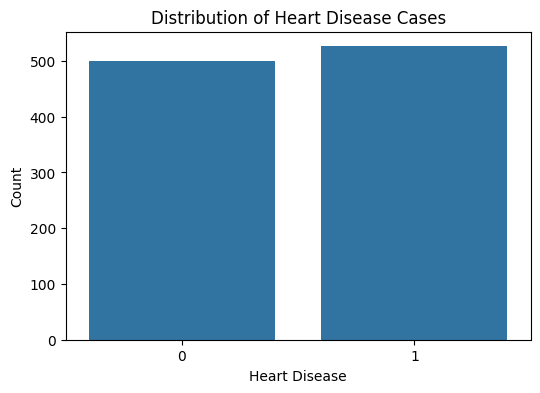

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_disease_data)
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

In [25]:
numeric_columns = heart_disease_data.select_dtypes(include=['number'])

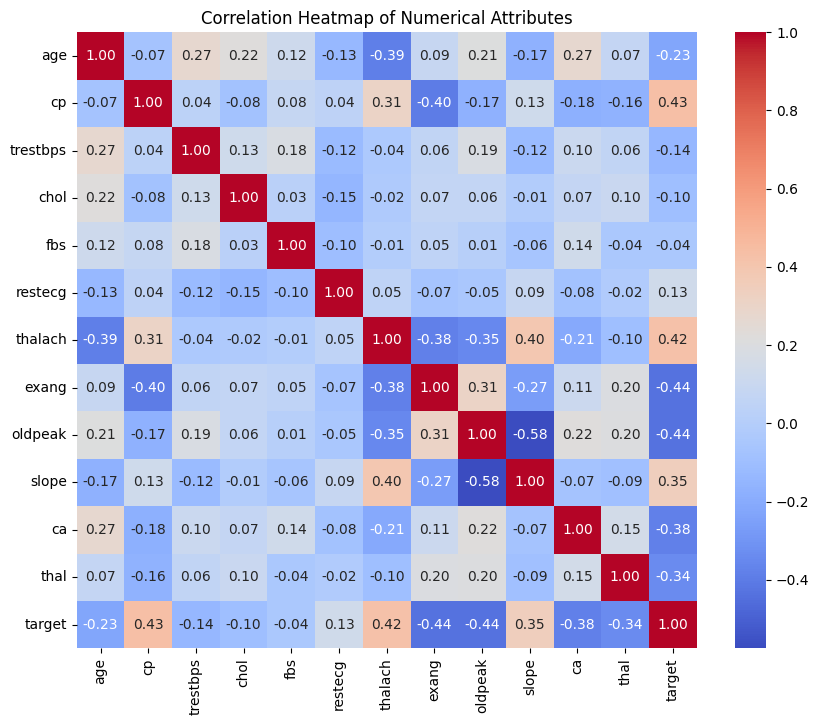

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()

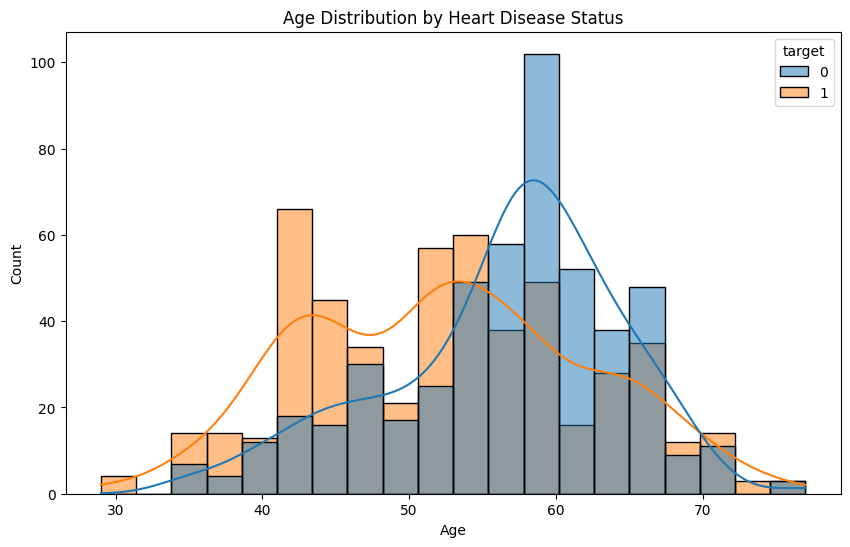

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_disease_data, x='age', hue='target', kde=True, bins=20)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

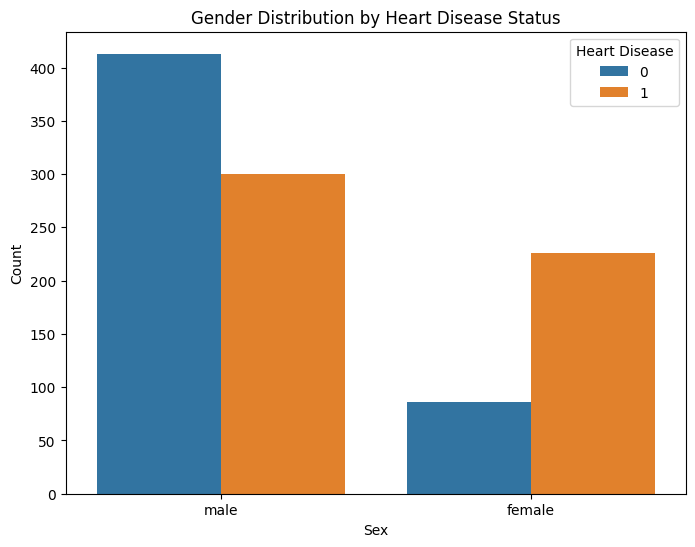

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=heart_disease_data)
plt.title('Gender Distribution by Heart Disease Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

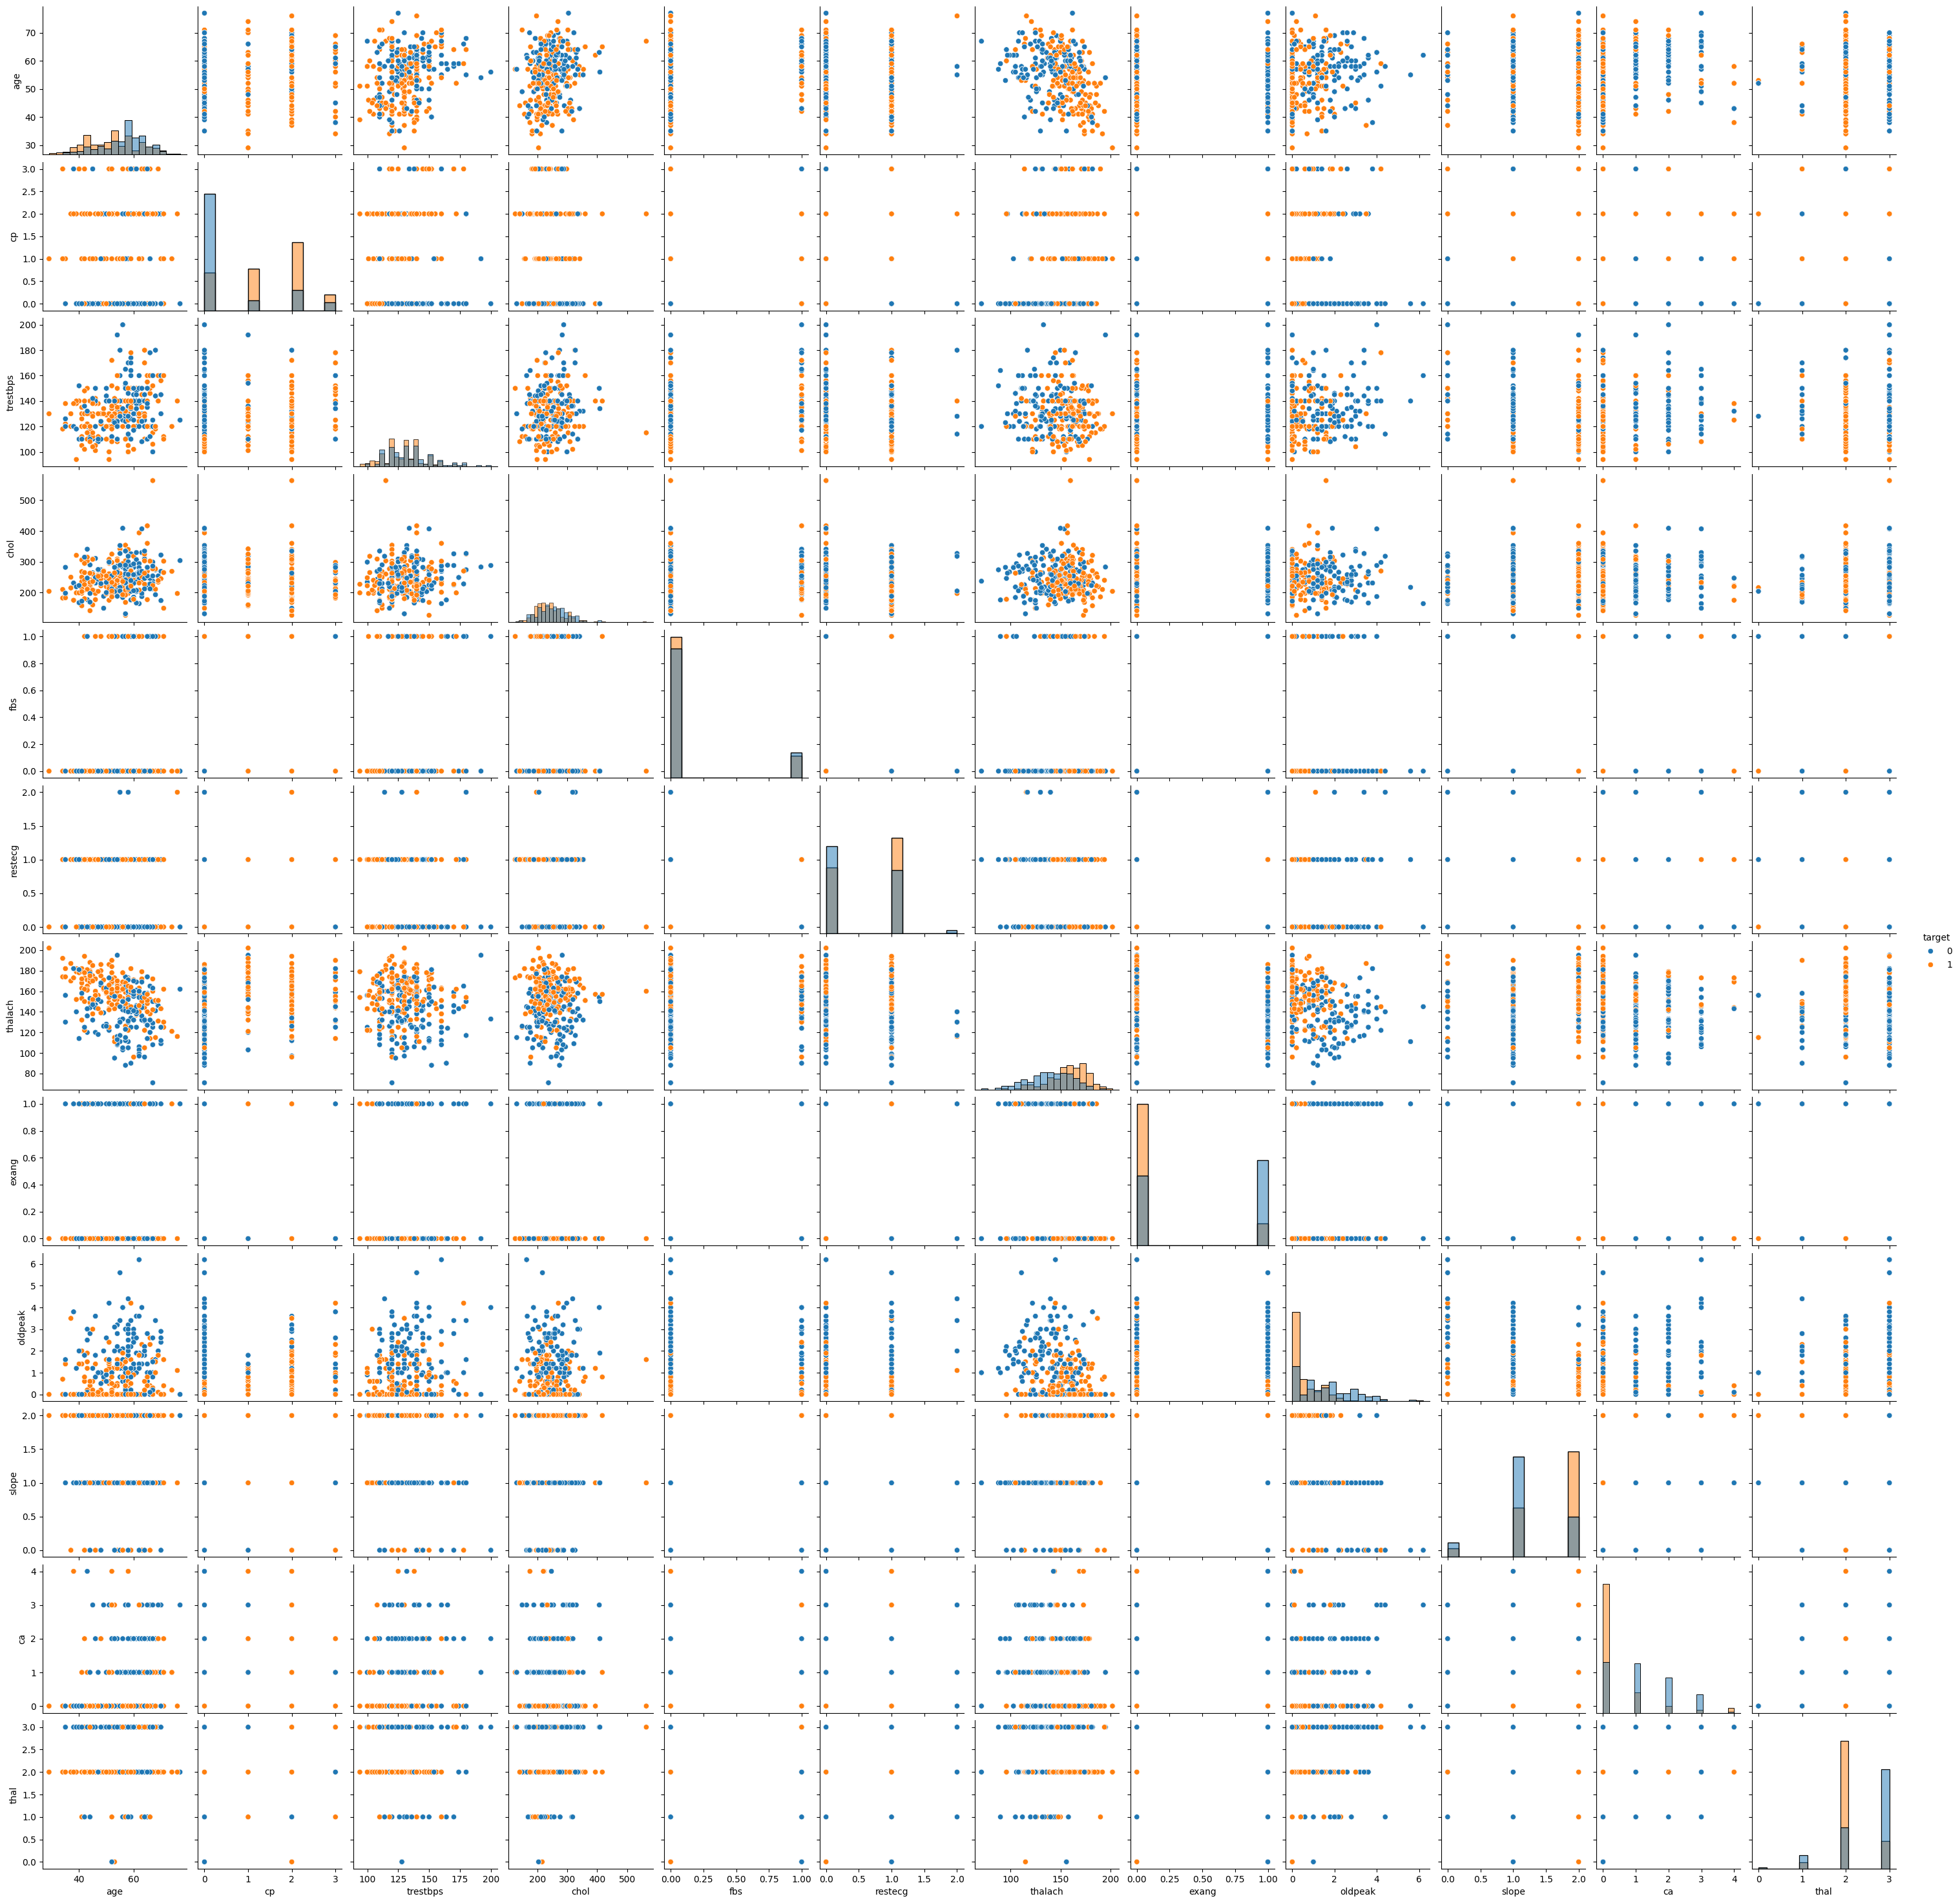

In [29]:
sns.pairplot(heart_disease_data, hue='target', diag_kind='hist')
plt.show()

In [30]:
heart_disease_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

C:\Users\Gourav vijay Gaikwad\AppData\Local\Temp\ipykernel_17148\2521836048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=heart_disease_data,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

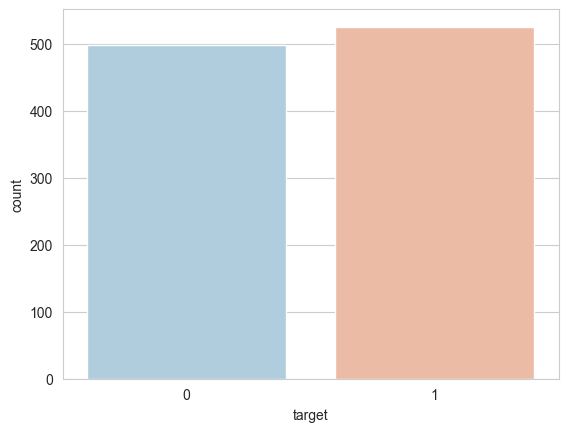

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_disease_data,palette='RdBu_r')

# Finds the Counts of males and Females

In [32]:
heart_disease_data['sex'].value_counts()

sex
male      713
female    312
Name: count, dtype: int64

C:\Users\Gourav vijay Gaikwad\AppData\Local\Temp\ipykernel_17148\2307075369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=heart_disease_data,palette='RdBu_r')


Text(0.5, 1.0, 'Count of Male and Female')

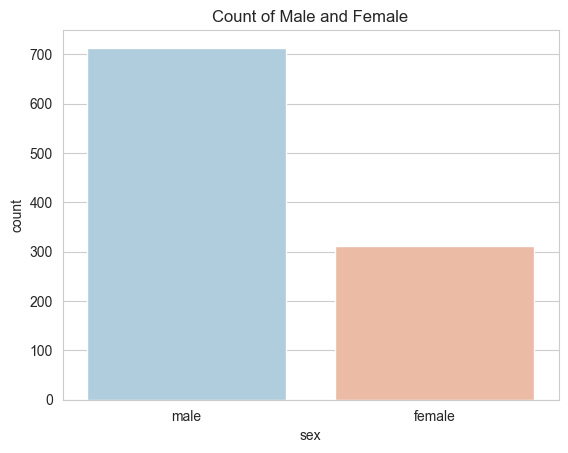

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=heart_disease_data,palette='RdBu_r')
plt.title('Count of Male and Female')

# Gender wise 

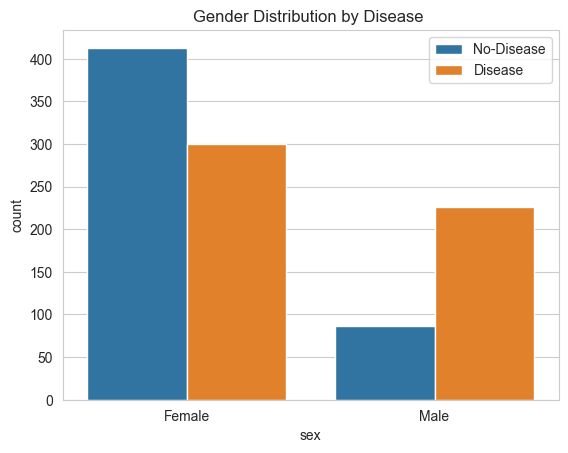

In [34]:
sns.countplot(data=heart_disease_data,x='sex', hue='target')
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.title('Gender Distribution by Disease ')
plt.show()

Text(0.5, 1.0, 'Chest pain by Age')

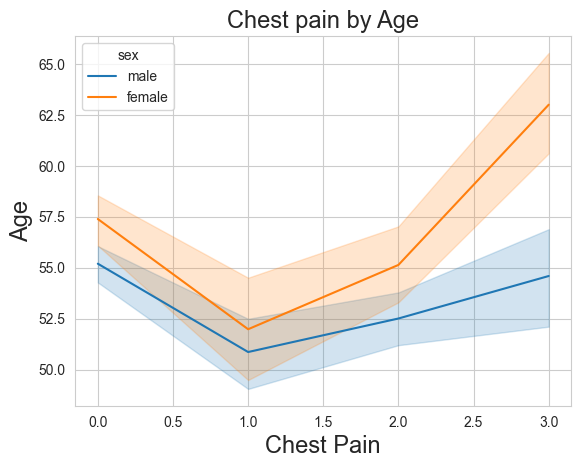

In [35]:
sns.lineplot(x='cp',data=heart_disease_data,y='age', hue='sex')
plt.xlabel('Chest Pain',fontsize=17)
plt.ylabel('Age',fontsize=17)
plt.title('Chest pain by Age',fontsize=17)

Text(0.5, 1.0, 'FBS by Targeted People')

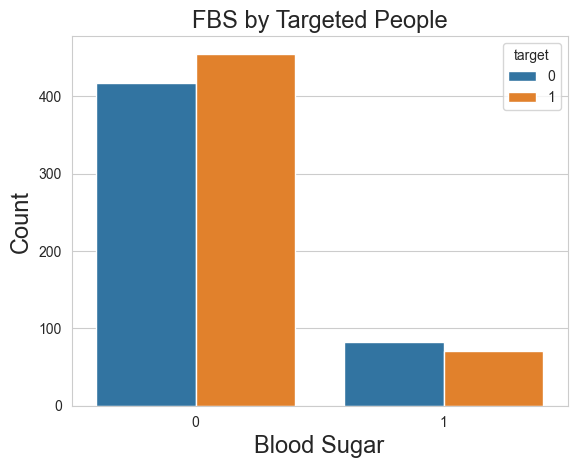

In [36]:
sns.countplot(data=heart_disease_data,x='fbs', hue='target')
plt.xlabel('Blood Sugar',fontsize=17)
plt.ylabel('Count',fontsize=17)
plt.title('FBS by Targeted People',fontsize=17)

Text(0.5, 1.0, 'trestbps')

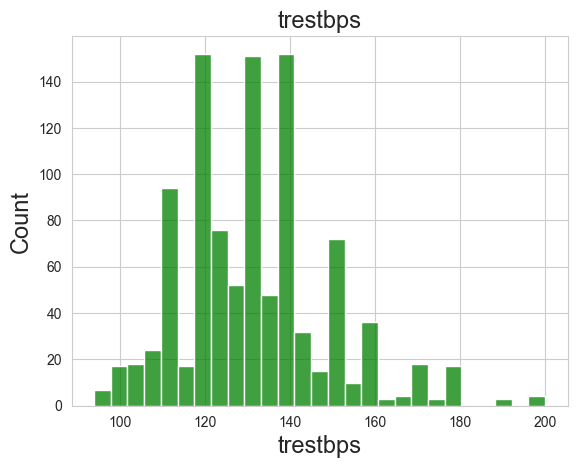

In [37]:
sns.histplot(x='trestbps',data=heart_disease_data, color='green')
plt.show
plt.xlabel('trestbps',fontsize=17)
plt.ylabel('Count',fontsize=17)
plt.title('trestbps',fontsize=17)

<function matplotlib.pyplot.show(close=None, block=None)>

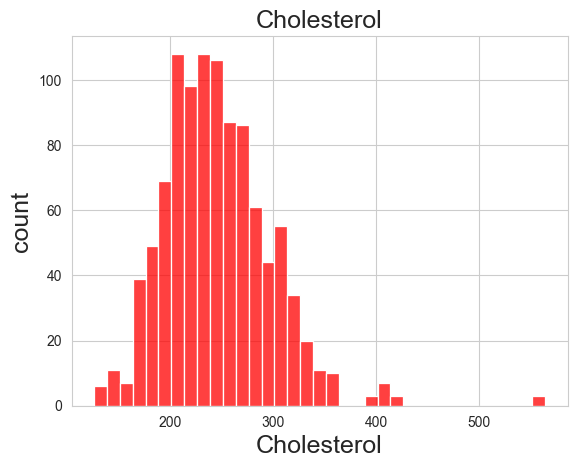

In [38]:
sns.histplot(x='chol',data=heart_disease_data,color='red')
plt.xlabel('Cholesterol',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Cholesterol',fontsize=18)
plt.show

# Thank you